# Titanic Dataset 

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Loading datasets:

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('gender_submission.csv')

Briefly looking at sample

In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [4]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
del sample

Briefly looking at train:

In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


train dataset has 5 int type data columns, 5 object type data columns, and 2 float type data columns.

'Age' and 'Cabin' columns have null or missing values.

In [8]:
print("Percent of rows of the dataset with missing age values:",(train[train.Age.isna()].shape[0]/train.shape[0])*100)

Percent of rows of the dataset with missing age values: 19.865319865319865


In [9]:
print("Percent of rows of the dataset with missing Cabin values:",(train[train.Cabin.isna()].shape[0]/train.shape[0])*100)

Percent of rows of the dataset with missing Cabin values: 77.10437710437711


This suggests that although age missing values may be imputed, Cabin missing values may not be imputable.

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Briefly looking at test dataset:

In [11]:
test.shape

(418, 11)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


test dataset has all columns of train dataset except 'Survived' column.

'Age' and 'Cabin' columns have null or missing values.

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploring and analysing train dataset:

In [14]:
train.drop(['PassengerId'], axis = 1, inplace = True)

<b><u>Univariate Analysis</u></b>

<b>Pclass</b> (ticket class)

In [15]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<b>Name</b>

In [16]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

<b>Sex</b>

In [17]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

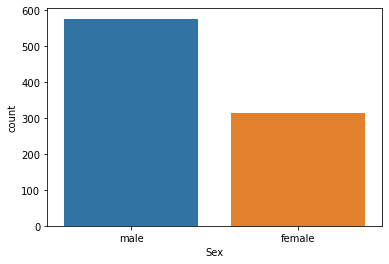

In [18]:
sns.countplot(x = train.Sex);

<b>Age</b>

In [19]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

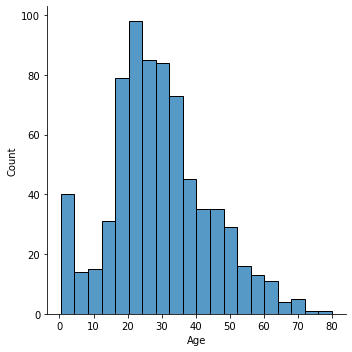

In [20]:
sns.displot(x = train.Age);

There are a lot of young children and middle aged people in the train dataset.

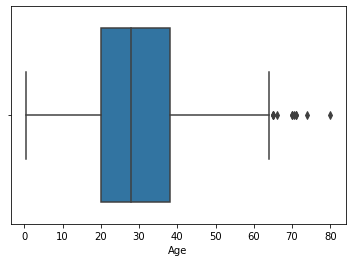

In [21]:
sns.boxplot(x = train.Age);

In [22]:
iqr = train.Age.describe()['75%'] - train.Age.describe()['25%']
upper = train.Age.describe()['75%'] + 1.5*iqr
lower = train.Age.describe()['25%'] - 1.5*iqr
print(iqr, lower, upper)

17.875 -6.6875 64.8125


In [23]:
train[train.Age > upper].shape

(11, 11)

In [24]:
train[train.Age > upper]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


Even though the ages above 64 are outliers, it just suggest that not many old people were on board the ship. (64-80 years of age is not really uncommon)

In [25]:
train[train.Age > upper]['Survived'].value_counts(normalize = True)

0    0.909091
1    0.090909
Name: Survived, dtype: float64

About 90% of the passengers who are outliers in terms of age do not survive.

<b>SibSp</b> (number of siblings or spouses)

In [26]:
train.SibSp.value_counts(normalize = True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

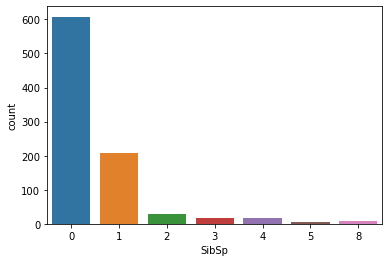

In [27]:
sns.countplot(x = train.SibSp);

The number of siblings or spouses for a passenger on board the ship was between 0 to 5 inclusive. Most passengers, about 68%, had no siblings or spouses. Only about 0.5% of the passengers had 5 siblings or spouses.

<b>Parch</b> (number of parents or children)

In [28]:
train.Parch.value_counts(normalize = True)

0    0.760943
1    0.132435
2    0.089787
3    0.005612
5    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

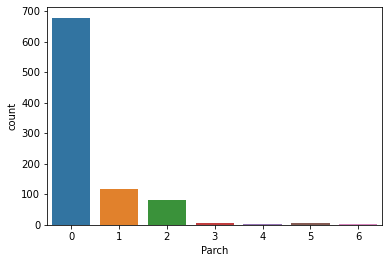

In [29]:
sns.countplot(x = train.Parch);

The number of parents or children on board the ship for a passenger was between 0 to 6 inclusive. Most passengers, about 76%, had no parents or children. Only 0.1% of the passengers has 6 parents or children.

<b>Ticket</b>

In [30]:
#must be treated like a categorical variable
train.Ticket.value_counts()

1601         7
CA. 2343     7
347082       7
CA 2144      6
3101295      6
            ..
PC 17605     1
S.P. 3464    1
350035       1
350046       1
29104        1
Name: Ticket, Length: 681, dtype: int64

In [31]:
len(train.Ticket.unique())

681

Many tickets are assigned to multiple passengers. 

<b>Fare</b>

In [32]:
len(train.Fare.value_counts())

248

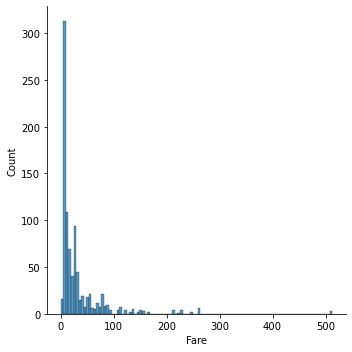

In [33]:
sns.displot(x = train.Fare);

The distribution of Fare is strongly right skewed. This suggests that most passengers travelled on cheaper fare.

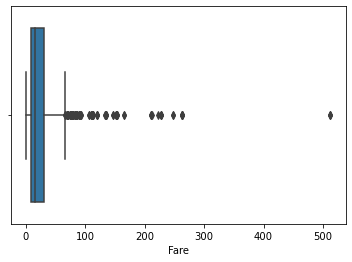

In [34]:
sns.boxplot(x = train.Fare);

In [35]:
iqr = train.Fare.describe()['75%'] - train.Fare.describe()['25%']
upper = train.Fare.describe()['75%'] + 1.5*iqr
lower = train.Fare.describe()['25%'] - 1.5*iqr
print(iqr, lower, upper)

23.0896 -26.724 65.6344


In [36]:
train[train.Fare > upper].shape

(116, 11)

In [37]:
train[train.Fare > upper]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


Although there are 166 outliers in terms of fare payed, it must be expected since titanic was also ment to provide luxary for those who could afford it. 

In [38]:
train[train.Fare > upper]['Survived'].value_counts(normalize = True)

1    0.681034
0    0.318966
Name: Survived, dtype: float64

Most passengers, about 68%, who payed higher fare survived. 

<b>Cabin</b>

In [39]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
C110           1
B3             1
D56            1
D6             1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

There are 4 passengers who are assigned 3 cabins.

In [40]:
len(train.Cabin.value_counts())

147

<b>Embarked</b> Port of Embarkation

In [41]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C = Cherbourg, Q = Queenstown, S = Southampton

<b><u>Bivarite Analysis</u></b>

<b>Survived and Pclass</b>

In [42]:
pd.crosstab(index = train.Survived, columns = train.Pclass, normalize = True, margins = True)

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


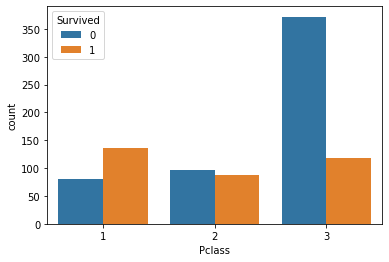

In [43]:
sns.countplot(x = train.Pclass, hue = train.Survived);

Most passengers in Class 1 survived whereas most passengers in Class 3 did not survive. Ratio of passengers who survived and who did not survive is almost equal in class 2.

<b>Survived and Sex</b>

In [44]:
pd.crosstab(index = train.Survived, columns = train.Sex, normalize = True, margins = True)

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


This shows that more females survived than males.

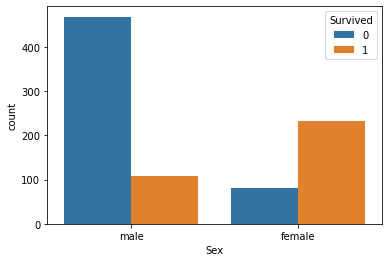

In [45]:
sns.countplot(x = train.Sex, hue = train.Survived);

<b>Survived and Age</b>

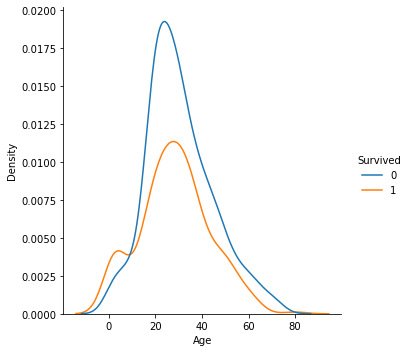

In [46]:
sns.displot(x = train.Age, hue = train.Survived, kind = 'kde');

The density plot for those who survived is above that of those who did not survive till the age of approximately 17. This suggests that younger passengers were more likely to survive.

<b>Survived and SibSp</b>

In [47]:
pd.crosstab(index = train.Survived, columns = train.SibSp, margins = True, normalize = True)

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856,0.616162
1,0.235690,0.125701,0.014590,0.004489,0.003367,0.000000,0.000000,0.383838
All,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856,1.000000


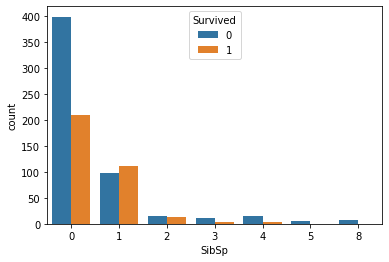

In [48]:
sns.countplot(x = train.SibSp, hue = train.Survived);

Most people with no siblings or spouses did not survive. Those who had 1 sibling or spouse mostly survided. Passengers with more than 1 sibling or spouses were more likely to not survive.

<b>Survived and Parch</b>

In [49]:
pd.crosstab(index = train.Survived, columns = train.Parch, margins = True, normalize = True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,0.499439,0.059484,0.044893,0.002245,0.004489,0.004489,0.001122,0.616162
1,0.261504,0.072952,0.044893,0.003367,0.000000,0.001122,0.000000,0.383838
All,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,1.000000


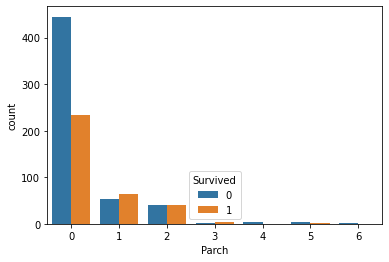

In [50]:
sns.countplot(x = train.Parch, hue = train.Survived);

Most people with no parents or children did not survive. Those having 1 or 2 parents or chidren were more likely to survive. Passengers with 3 or more than 3 parents or children were less likely to survive.

<b>Survived and Fare</b>

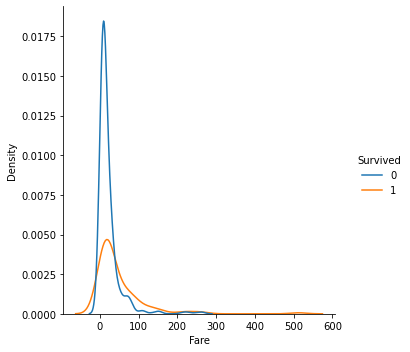

In [51]:
sns.displot(x = train.Fare, hue = train.Survived, kind = 'kde');

Passengers who paid higher fair were more likely to survive.

<b>Survived and Embarked</b>

In [52]:
pd.crosstab(index = train.Survived, columns = train.Embarked, margins = True, normalize = True)

Embarked,C,Q,S,All
Survived,,,,
0,0.084364,0.052868,0.480315,0.617548
1,0.104612,0.033746,0.244094,0.382452
All,0.188976,0.086614,0.724409,1.000000


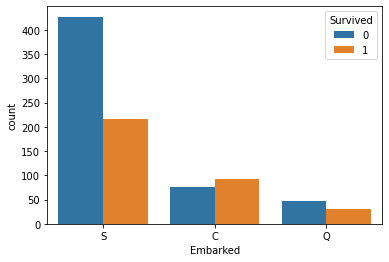

In [53]:
sns.countplot(x = train.Embarked, hue = train.Survived);

Passengers who embarked from S and Q were more likey to not survive.

### Missing value treatement

Dealing with Age:

In [54]:
no_age = train[train.Age.isnull()] #passengers with no age adata
no_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [55]:
no_age.Sex.value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [56]:
no_age.Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [57]:
no_age.SibSp.value_counts()

0    137
1     26
8      7
3      4
2      3
Name: SibSp, dtype: int64

Among those whose age is missing, passengers with less co-passengers seem less likely to survive.

In [58]:
no_age.Parch.value_counts()

0    157
2     12
1      8
Name: Parch, dtype: int64

In [59]:
pd.crosstab(index = no_age.Survived, columns = no_age.Parch, margins = True, normalize = True)

Parch,0,1,2,All
Survived,,,,
0,0.621469,0.022599,0.062147,0.706215
1,0.265537,0.022599,0.005650,0.293785
All,0.887006,0.045198,0.067797,1.000000


Among those whose age is missing, passengers with less parents/children seem less likely to survive.

Missing age values can be replaced by the median of all age values.

Dealing with Ticket:

In [60]:
train.Ticket.value_counts().shape

(681,)

In [61]:
count = 0
for i in train.Ticket.value_counts():
    if i > 1:
        count = count + 1

In [62]:
print("In", train.Ticket.value_counts().shape[0], "unique tickets", count, "tickets are repeated.")

In 681 unique tickets 134 tickets are repeated.


In [63]:
print((count/train.Ticket.value_counts().shape[0])*100, "% tickets are repeated.")

19.676945668135097 % tickets are repeated.


In [64]:
just_numbers = [] #stores all ticket numbers that are totally numeric
alpha_numeric = [] #stores all ticket numbers that are alpha numeric
for i in train.Ticket.values:
    if i.isnumeric():
        just_numbers.append(i)
    else:
        alpha_numeric.append(i) 

In [65]:
len(just_numbers), len(alpha_numeric)

(661, 230)

In [66]:
len(set(just_numbers)), len(set(alpha_numeric))

(514, 167)

In [67]:
just_numbers = np.array(just_numbers, dtype = 'int32')

In [68]:
np.sort(just_numbers)

array([    693,     695,    1601,    1601,    1601,    1601,    1601,
          1601,    1601,    2003,    2223,    2620,    2623,    2624,
          2625,    2626,    2627,    2627,    2628,    2629,    2631,
          2641,    2647,    2648,    2649,    2650,    2651,    2651,
          2653,    2653,    2659,    2659,    2661,    2661,    2662,
          2663,    2664,    2665,    2665,    2666,    2666,    2666,
          2666,    2667,    2668,    2668,    2669,    2671,    2672,
          2674,    2677,    2678,    2678,    2680,    2683,    2685,
          2686,    2687,    2689,    2690,    2691,    2691,    2693,
          2694,    2695,    2697,    2699,    2699,    2700,    2908,
          2908,    2926,    3411,    3460,    3474,    4133,    4133,
          4133,    4133,    4134,    4135,    4136,    4137,    4138,
          4579,    5727,    6563,    7267,    7534,    7534,    7540,
          7545,    7546,    7552,    7553,    7598,    8471,    8475,
          9234,   11

The allocated numbers are not at all consistent.

In [69]:
alpha_numeric[0:20]

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 'PP 9549',
 'A/5. 2151',
 'PC 17601',
 'PC 17569',
 'C.A. 24579',
 'PC 17604',
 'A./5. 2152',
 'SC/Paris 2123',
 'S.C./A.4. 23567',
 'A/4. 39886',
 'PC 17572',
 'C.A. 31026',
 'C.A. 34651',
 'CA 2144',
 'PC 17605',
 'C.A. 29395',
 'S.P. 3464']

There is a possibility that the only numeric tickets have missing alpha part. Usually ticket number are boarding specific.

In [70]:
#looking more closely are alpha-numeric tickets
number_part = []
other_part = []
for i in alpha_numeric:
    a = re.findall(r'\b[0-9]+$', i)
    if len(a) == 1:
        a = int(a[0])
        number_part.append(a)
        b = re.split(r'\b[0-9]+$', i)[0]
        other_part.append(b)
    else:
        print(re.split(r'\b[0-9]+$', i)[0])

LINE
LINE
LINE
LINE


In [71]:
other_part[0:6]

['A/5 ', 'PC ', 'STON/O2. ', 'PP ', 'A/5. ', 'PC ']

In [72]:
train[train.Ticket == 'LINE']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


There are 4 tickets with LINE written. All 4 of these tickets have been issued at S, all passengers here are males, theirs ages are atmost middle-age. Only 1 of these survived.

In [73]:
np.unique(other_part)

array(['A./5. ', 'A.5. ', 'A/4 ', 'A/4. ', 'A/5 ', 'A/5. ', 'A/S ',
       'A4. ', 'C ', 'C.A. ', 'C.A./SOTON ', 'CA ', 'CA. ', 'F.C. ',
       'F.C.C. ', 'Fa ', 'P/PP ', 'PC ', 'PP ', 'S.C./A.4. ',
       'S.C./PARIS ', 'S.O./P.P. ', 'S.O.C. ', 'S.O.P. ', 'S.P. ',
       'S.W./PP ', 'SC ', 'SC/AH ', 'SC/AH Basle ', 'SC/PARIS ',
       'SC/Paris ', 'SCO/W ', 'SO/C ', 'SOTON/O.Q. ', 'SOTON/O2 ',
       'SOTON/OQ ', 'STON/O 2. ', 'STON/O2. ', 'SW/PP ', 'W./C. ',
       'W.E.P. ', 'W/C ', 'WE/P '], dtype='<U12')

A lot of these differ only by the '.' or '/' symbols or white spaces. 

In [74]:
pd.Series(np.array(other_part)).value_counts()

PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
CA.              8
SOTON/O.Q.       8
SOTON/OQ         7
A/5.             7
STON/O2.         6
CA               6
SC/PARIS         5
S.O.C.           5
F.C.C.           5
C                5
SC/Paris         4
A/4              3
A/4.             3
S.O./P.P.        3
PP               3
WE/P             2
SOTON/O2         2
A.5.             2
S.C./PARIS       2
P/PP             2
A./5.            2
SC/AH            2
W.E.P.           1
S.W./PP          1
A/S              1
SC               1
F.C.             1
C.A./SOTON       1
SW/PP            1
W/C              1
SCO/W            1
S.C./A.4.        1
SO/C             1
Fa               1
S.P.             1
S.O.P.           1
A4.              1
SC/AH Basle      1
dtype: int64

Among the the tickets with letters and numbers, there are comparitively many tickets that have letters 'PC' in them. 

In [75]:
#getting a list of all ticket starting with PC
pc_tickets = []
for i, j in enumerate(train.Ticket.values):
    if j.startswith('PC'):
        pc_tickets.append(i)
    

In [76]:
train.iloc[pc_tickets, ]['Survived'].value_counts()

1    39
0    21
Name: Survived, dtype: int64

Most of the passengers with letters 'PC' on their ticket survived.

In [77]:
#getting a list of all ticket starting with C.A.
ca_tickets = []
for i, j in enumerate(train.Ticket.values):
    if j.startswith('C.A.'):
        ca_tickets.append(i)
    

In [78]:
train.iloc[ca_tickets, ]['Survived'].value_counts()

0    15
1    13
Name: Survived, dtype: int64

For passengers with letters 'C.A.' on their ticket, there is a fair split on the ratio of passenger who survived and who did not survive 

In [79]:
#getting a list of all ticket starting with CA.
ca_tickets = []
for i, j in enumerate(train.Ticket.values):
    if j.startswith('CA'):
        ca_tickets.append(i)

In [80]:
train.iloc[ca_tickets, ]['Survived'].value_counts()

0    13
1     1
Name: Survived, dtype: int64

For passengers with letters 'CA.' on their ticket, only 1 survived in 14.

In [81]:
train.iloc[ca_tickets, ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
480,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
649,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.55,NaN,S
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.90,NaN,S


In [82]:
train[train.Ticket == 'CA. 2343']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [83]:
train[train.Ticket == '347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [84]:
train[train.Ticket == '1601']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [85]:
train[train.Ticket == '3101295']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


In [86]:
train[train.Ticket == '347088']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S
360,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S
634,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S
642,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S
819,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S


Ticket values do seem to be related to Survial somehow. The Ticket data needs to be cleaned for proper use.

In [87]:
ticket_code = []
ticket_num = []
for i in train.Ticket.values:
    num = re.findall(r'\b[0-9]+$', i)
    code = re.split(r'\b[0-9]+$', i)[0]
    ticket_code.append(code)
    if(len(num) == 0):
        ticket_num.append(np.nan)
    else:
        ticket_num.append(int(num[0]))
        

In [88]:
train['ticket_code'] = pd.Series(np.array(ticket_code))
train['ticket_num'] = pd.Series(np.array(ticket_num))

In [89]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_code,ticket_num
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,,113803.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,,373450.0


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  ticket_code  891 non-null    object 
 12  ticket_num   887 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 90.6+ KB


In [91]:
train.drop(['Ticket'], axis = 1, inplace = True)

There still are rows where ticket_num is missing.

In [92]:
train[train['ticket_num'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code,ticket_num
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,NaN,S,LINE,NaN
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,NaN,S,LINE,NaN
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,NaN,S,LINE,NaN
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,NaN,S,LINE,NaN


In [93]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code,ticket_num
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,A/5,21171.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,PC,17599.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,STON/O2.,3101282.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,,113803.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,,373450.0


In [94]:
def clean_ticket(s):
    s = s.lower()
    s = ''.join(w.strip() for w in s.split())
    s = re.sub(r'[^a-zA-Z0-9]', '', s)
    return s

In [95]:
train.ticket_code = train.ticket_code.apply(clean_ticket)

In [96]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code,ticket_num
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,a5,21171.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,pc,17599.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,stono2,3101282.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,,113803.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,,373450.0


Dealing with Name:

Since survival of passengers has nothing to do with their name, it can be ignored.

In [97]:
train.drop(['Name'], axis = 1, inplace = True)

In [98]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code,ticket_num
0,0,3,male,22.0,1,0,7.2500,NaN,S,a5,21171.0
1,1,1,female,38.0,1,0,71.2833,C85,C,pc,17599.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,stono2,3101282.0
3,1,1,female,35.0,1,0,53.1000,C123,S,,113803.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,,373450.0


Dealing with Cabin:

In [99]:
temp = train.Cabin.value_counts()

In [100]:
len(temp[temp > 1])

46

In [101]:
len(temp[temp == 1])

101

In [102]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabin does not provide enough data. It is best to remove the cabin data.

In [103]:
train.drop(['Cabin'], axis = 1, inplace = True)

In [104]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_code,ticket_num
0,0,3,male,22.0,1,0,7.2500,S,a5,21171.0
1,1,1,female,38.0,1,0,71.2833,C,pc,17599.0
2,1,3,female,26.0,0,0,7.9250,S,stono2,3101282.0
3,1,1,female,35.0,1,0,53.1000,S,,113803.0
4,0,3,male,35.0,0,0,8.0500,S,,373450.0


#### Strategy to deal with missing values

Option 1: Remove all missing values and remove ticket data.<br>
Option 2: All missing values are in columns Age, ticket_code and ticket_num.<br>
-----Sub-option 1: Replace missing age values by meidan value of age. Remove ticket data. <br>
-----Sub-option 2: Replace missing age values by median value of age. Replace missing ticket_num by -1. Replace missing ticket_code i.e. '' by 'no_code' (This can then be replaced by numerical labels.) <br>
Option3: Keep all missing values and use algorithms that support missing values

### Model building with Option 1

In [105]:
train1 = train.drop(['ticket_code', 'ticket_num'], axis = 1)

In [106]:
train1.dropna(inplace = True)

In [107]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


Convert 'Sex' and 'Embarked' columns to type category

In [108]:
train1['Sex'] = train1['Sex'].astype('category')
train1['Embarked'] = train1['Embarked'].astype('category')

In [109]:
train1['Age'] = train1['Age'].astype('int64')

In [110]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    int64   
 1   Pclass    712 non-null    int64   
 2   Sex       712 non-null    category
 3   Age       712 non-null    int64   
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Fare      712 non-null    float64 
 7   Embarked  712 non-null    category
dtypes: category(2), float64(1), int64(5)
memory usage: 40.6 KB


In [111]:
train1 = pd.get_dummies(train1, columns = ['Sex', 'Embarked'])

In [112]:
train1.drop(['Sex_male'], axis = 1, inplace = True) #Do not need this column as it adds no new information

In [113]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,0,0,1
1,1,1,38,1,0,71.2833,1,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,1
4,0,3,35,0,0,8.0500,0,0,0,1


Setting up train and test data:

In [114]:
X = train1.drop(['Survived'], axis = 1)
y = train1['Survived']

In [115]:
y.value_counts()

0    424
1    288
Name: Survived, dtype: int64

Undersampling will wipe off almost half of the data. Oversampling must be used. 

In [116]:
#trying SMOTE oversampling
over_sampler = SMOTE(random_state = 1)
X_resampled, y_resampled  = over_sampler.fit_resample(X, y)

In [117]:
X_resampled.shape, y_resampled.shape

((848, 9), (848,))

In [118]:
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [119]:
X_resampled[0]

array([1.        , 0.275     , 0.2       , 0.        , 0.01415106,
       0.        , 0.        , 0.        , 1.        ])

In [120]:
y_resampled.value_counts()

0    424
1    424
Name: Survived, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1, stratify = y_resampled)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((678, 9), (170, 9), (678,), (170,))

Algorithms to try:<br>
-Logistic Regression <br>
-SVM <br>
-KNN <br>
-Naive-Bayes<br>
-Decision Tree Classifier <br>
-Random Forest Classifier <br>
-Gradient Boost classifier <br>
-XGBoost<br>
-NN


<i>Logistic Regression:</i>

In [123]:
lr = LogisticRegression(random_state = 1, solver = 'liblinear') 
lr_scores = cross_val_score(lr, X_train, y_train, cv = 3)

In [124]:
lr_scores

array([0.80973451, 0.73451327, 0.76106195])

In [125]:
lr_scores.mean()

0.7684365781710915

The logistic regression model has an average accuracy of about 76%.

In [126]:
lr.fit(X_train, y_train) 
pred_test = lr.predict(X_test)

In [127]:
pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

<AxesSubplot:>

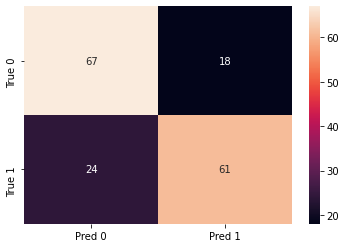

In [128]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [129]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = lr.classes_))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        85
           1       0.77      0.72      0.74        85

    accuracy                           0.75       170
   macro avg       0.75      0.75      0.75       170
weighted avg       0.75      0.75      0.75       170



According to the classification report, the model has an average f1-score of about 0.75.

In [130]:
print('Training accuracy:',lr.score(X_train, y_train))

Training accuracy: 0.7817109144542773


In [131]:
print('Testing accuracy:',lr.score(X_test, y_test))

Testing accuracy: 0.7529411764705882


The model is slightly overfit.

In [224]:
o1_summary = {'lr' : [lr.score(X_train, y_train), lr.score(X_test, y_test), 0.75]}

In [225]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75]}

<i>SVM</i>

In [132]:
svc = SVC(random_state = 1)
svc_scores = cross_val_score(svc, X_train, y_train, cv = 3)

In [133]:
svc_scores

array([0.76106195, 0.72566372, 0.7920354 ])

In [134]:
svc_scores.mean()

0.7595870206489677

Average svc accuracy is about 76%.

In [135]:
params = {'C' : [0.8, 1, 1.2, 1.4], 'kernel' : ['linear', 'rbf', 'poly'], 'degree':[3,4]}
grid = GridSearchCV(SVC(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=1),
             param_grid={'C': [0.8, 1, 1.2, 1.4], 'degree': [3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [136]:
grid.best_params_

{'C': 1.4, 'degree': 4, 'kernel': 'poly'}

In [137]:
svc_scores = cross_val_score(SVC(C = 1.2, kernel = 'linear'), X_train, y_train, cv = 3)

In [138]:
svc_scores

array([0.78318584, 0.74778761, 0.79646018])

In [139]:
svc_scores.mean()

0.775811209439528

This is almost 1% increase in accuracy.

In [140]:
svc = SVC(C = 1.2, kernel = 'linear')
svc.fit(X_train, y_train)

SVC(C=1.2, kernel='linear')

In [141]:
pred_test = svc.predict(X_test)

<AxesSubplot:>

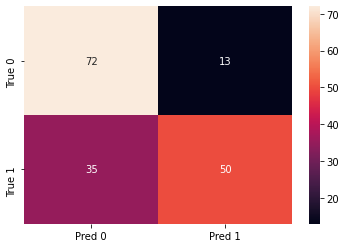

In [142]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [143]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = svc.classes_))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        85
           1       0.79      0.59      0.68        85

    accuracy                           0.72       170
   macro avg       0.73      0.72      0.71       170
weighted avg       0.73      0.72      0.71       170



The average f1 score of the svc model is about 72%.

In [144]:
print('Training accuracy:',svc.score(X_train, y_train))

Training accuracy: 0.7728613569321534


In [145]:
print('Testing accuracy:',svc.score(X_test, y_test))

Testing accuracy: 0.7176470588235294


The model is slightly overfit

In [226]:
o1_summary.update({'svm' : [svc.score(X_train, y_train), svc.score(X_test, y_test), 0.72]})

In [227]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72]}

<i>KNN</i>

In [146]:
knn = KNeighborsClassifier()

In [147]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 3)

In [148]:
knn_scores

array([0.78318584, 0.77876106, 0.78761062])

In [149]:
knn_scores.mean()

0.7831858407079646

The mean accuracy of the knn model is about 78%.

In [150]:
params = {'n_neighbors': [1,2,3,4,5,6], 'weights' : ['uniform', 'distance'], 'p' :[2,3]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [151]:
grid.best_params_

{'n_neighbors': 6, 'p': 3, 'weights': 'distance'}

In [152]:
knn = KNeighborsClassifier(n_neighbors = 2, p = 2, weights = 'distance')

In [153]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 3)

In [154]:
knn_scores

array([0.75663717, 0.74336283, 0.78318584])

In [155]:
knn_scores.mean()

0.7610619469026548

The mean accuracy of knn model is about 76%.

In [156]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [157]:
pred_test = knn.predict(X_test)
pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

<AxesSubplot:>

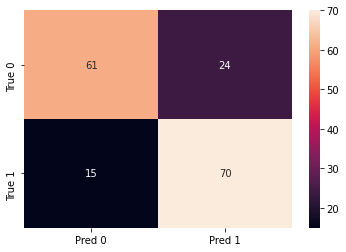

In [158]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [159]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        85
           1       0.74      0.82      0.78        85

    accuracy                           0.77       170
   macro avg       0.77      0.77      0.77       170
weighted avg       0.77      0.77      0.77       170



The average f1 score of knn model is about 77%.

In [160]:
print('Training accuracy:',knn.score(X_train, y_train))

Training accuracy: 0.9911504424778761


In [161]:
print('Testing accuracy:',knn.score(X_test, y_test))

Testing accuracy: 0.7705882352941177


This model is much more overfit compared to other models.

In [228]:
o1_summary.update({'knn' : [knn.score(X_train, y_train), knn.score(X_test, y_test), 0.77]})

In [229]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77]}

<i>GausianNB</i>

In [162]:
nb_scores = cross_val_score(GaussianNB(), X_train, y_train, cv = 3)

In [163]:
nb_scores

array([0.80530973, 0.71238938, 0.75663717])

In [164]:
nb_scores.mean()

0.7581120943952803

Naive-Bayes model has a mean accuracy score of 76%.

In [165]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [166]:
pred_test = nb.predict(X_test)
pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

<AxesSubplot:>

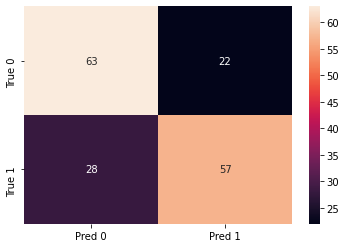

In [167]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [168]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        85
           1       0.72      0.67      0.70        85

    accuracy                           0.71       170
   macro avg       0.71      0.71      0.71       170
weighted avg       0.71      0.71      0.71       170



The average f1 score of Naive Bayes model is about 71%.

In [169]:
print('Training accuracy:',nb.score(X_train, y_train))

Training accuracy: 0.7625368731563422


In [170]:
print('Testing accuracy:',nb.score(X_test, y_test))

Testing accuracy: 0.7058823529411765


This model is slightly overfit.

In [230]:
o1_summary.update({'nb' : [nb.score(X_train, y_train), nb.score(X_test, y_test), 0.71]})

In [231]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77],
 'nb': [0.7625368731563422, 0.7058823529411765, 0.71]}

<i>Decision Tree Classifier</i>

In [171]:
dt_score = cross_val_score(DecisionTreeClassifier(random_state = 1), X_train, y_train, cv = 3)

In [172]:
dt_score

array([0.76106195, 0.73451327, 0.78318584])

In [173]:
dt_score.mean()

0.7595870206489675

The average accuracy is about 76%.

In [174]:
params = {'max_features' : ['auto', 'sqrt', 'log2'], 'ccp_alpha' : [0, 0.05, 0.1], 'min_samples_split' : [2,3]}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0, 0.05, 0.1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3]})

In [175]:
grid.best_params_

{'ccp_alpha': 0, 'max_features': 'auto', 'min_samples_split': 2}

In [176]:
dt = DecisionTreeClassifier(random_state = 1, max_features = 'auto')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features='auto', random_state=1)

In [177]:
pred_test = dt.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

<AxesSubplot:>

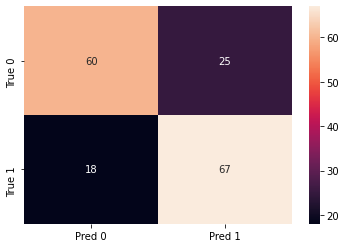

In [178]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [179]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        85
           1       0.73      0.79      0.76        85

    accuracy                           0.75       170
   macro avg       0.75      0.75      0.75       170
weighted avg       0.75      0.75      0.75       170



The average f1 score is about 75%.

In [180]:
print('Training accuracy:',dt.score(X_train, y_train))

Training accuracy: 0.9911504424778761


In [181]:
print('Testing accuracy:',dt.score(X_test, y_test))

Testing accuracy: 0.7470588235294118


This model is overfit.

In [232]:
o1_summary.update({'dt' : [dt.score(X_train, y_train), dt.score(X_test, y_test), 0.75]})

In [233]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77],
 'nb': [0.7625368731563422, 0.7058823529411765, 0.71],
 'dt': [0.9911504424778761, 0.7470588235294118, 0.75]}

<i>Random Forest</i>

In [182]:
rf_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 3)

In [183]:
rf_scores

array([0.84955752, 0.74778761, 0.80530973])

In [184]:
rf_scores.mean()

0.8008849557522124

Random Forest model has an average accuracy of about 80%. 

In [185]:
params = {'n_estimators' : [100, 250, 500], 'max_features' : ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(RandomForestClassifier(random_state = 1, oob_score = True), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500]})

In [186]:
grid.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [187]:
rf = RandomForestClassifier(random_state = 1, oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [188]:
pred_test = rf.predict(X_test)
pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

<AxesSubplot:>

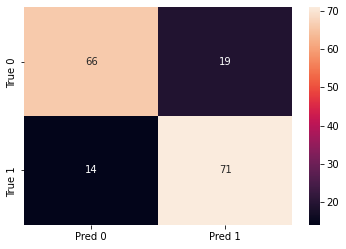

In [189]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [190]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        85
           1       0.79      0.84      0.81        85

    accuracy                           0.81       170
   macro avg       0.81      0.81      0.81       170
weighted avg       0.81      0.81      0.81       170



This model has an average f1 score of 81%. 

In [191]:
print('Training accuracy:',rf.score(X_train, y_train))

Training accuracy: 0.9911504424778761


In [192]:
print('Testing accuracy:',rf.score(X_test, y_test))

Testing accuracy: 0.8058823529411765


The model is overfit.

In [193]:
rf = rf = RandomForestClassifier(random_state = 1, oob_score = True, ccp_alpha = 0.00559)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.00559, oob_score=True, random_state=1)

In [194]:
print('Training accuracy:',rf.score(X_train, y_train))

Training accuracy: 0.8525073746312685


In [195]:
print('Testing accuracy:',rf.score(X_test, y_test))

Testing accuracy: 0.8058823529411765


In [196]:
pred_test = rf.predict(X_test)

In [197]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        85
           1       0.82      0.78      0.80        85

    accuracy                           0.81       170
   macro avg       0.81      0.81      0.81       170
weighted avg       0.81      0.81      0.81       170



The model after pruning is less overfit.

In [234]:
o1_summary.update({'rf' : [rf.score(X_train, y_train), rf.score(X_test, y_test), 0.81]})

In [235]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77],
 'nb': [0.7625368731563422, 0.7058823529411765, 0.71],
 'dt': [0.9911504424778761, 0.7470588235294118, 0.75],
 'rf': [0.8525073746312685, 0.8058823529411765, 0.81]}

<i>Gradient Boost<i>

In [198]:
gb_score = cross_val_score(GradientBoostingClassifier(random_state = 1), X_train, y_train, cv = 3)

In [199]:
gb_score

array([0.83628319, 0.78318584, 0.81415929])

In [200]:
gb_score.mean()

0.8112094395280236

Average accuracy of the Gradient Boosting model is about 81%.

In [201]:
params = {'learning_rate': [0.1, 0.15, 0.2], 'n_estimators' : [100, 200, 500]}
grid = GridSearchCV(GradientBoostingClassifier(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 500]})

In [202]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [203]:
gb = GradientBoostingClassifier(random_state = 1, n_estimators = 200)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=1)

In [204]:
pred_test = gb.predict(X_test)
pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

<AxesSubplot:>

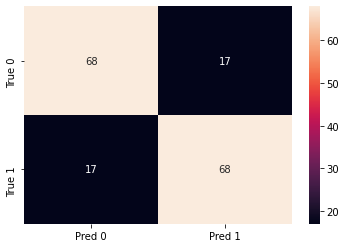

In [205]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [206]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        85
           1       0.80      0.80      0.80        85

    accuracy                           0.80       170
   macro avg       0.80      0.80      0.80       170
weighted avg       0.80      0.80      0.80       170



The gradient boosting model has an average f1 score of 80%.

In [207]:
print('Training accuracy:',gb.score(X_train, y_train))

Training accuracy: 0.9380530973451328


In [208]:
print('Testing accuracy:',gb.score(X_test, y_test))

Testing accuracy: 0.8


Model is overfit but has a good accuracy and f1 score.

In [236]:
o1_summary.update({'gb' : [gb.score(X_train, y_train), gb.score(X_test, y_test), 0.80]})

In [237]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77],
 'nb': [0.7625368731563422, 0.7058823529411765, 0.71],
 'dt': [0.9911504424778761, 0.7470588235294118, 0.75],
 'rf': [0.8525073746312685, 0.8058823529411765, 0.81],
 'gb': [0.9380530973451328, 0.8, 0.8]}

<i>XGBoost Classifier</i>

In [209]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [210]:
pred_test = xgb.predict(X_test)
pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

<AxesSubplot:>

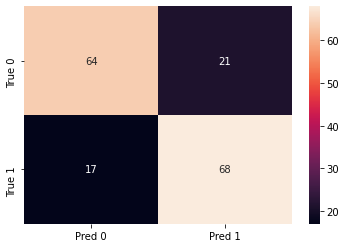

In [211]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [212]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        85
           1       0.76      0.80      0.78        85

    accuracy                           0.78       170
   macro avg       0.78      0.78      0.78       170
weighted avg       0.78      0.78      0.78       170



The gradient boost algorith has an average f1-score of about 78%.

In [213]:
print('Training accuracy:',xgb.score(X_train, y_train))

Training accuracy: 0.9823008849557522


In [214]:
print('Testing accuracy:',xgb.score(X_test, y_test))

Testing accuracy: 0.7764705882352941


This model is overfit.

In [238]:
o1_summary.update({'xgb' : [xgb.score(X_train, y_train), xgb.score(X_test, y_test), 0.78]})

In [239]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77],
 'nb': [0.7625368731563422, 0.7058823529411765, 0.71],
 'dt': [0.9911504424778761, 0.7470588235294118, 0.75],
 'rf': [0.8525073746312685, 0.8058823529411765, 0.81],
 'gb': [0.9380530973451328, 0.8, 0.8],
 'xgb': [0.9823008849557522, 0.7764705882352941, 0.78]}

<i>Neural Network</i>

In [215]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [216]:
X_train.shape

(678, 9)

In [217]:
nn = Sequential()
nn.add(Input(shape = (X_train.shape[1],)))
nn.add(Dense(units = 200, activation = 'relu', ))
nn.add(Dropout(0.4))
nn.add(Dense(units = 200, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 100, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 100, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 10, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [218]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

In [219]:
history = nn.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 20)

Epoch 1/20
17/17 [==============================] - 2s 13ms/step - loss: 0.6820 - accuracy: 0.5148 - val_loss: 0.6796 - val_accuracy: 0.4265
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.5849 - val_loss: 0.6381 - val_accuracy: 0.7132
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.6642 - val_loss: 0.5877 - val_accuracy: 0.7353
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.7306 - val_loss: 0.5419 - val_accuracy: 0.7279
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7546 - val_loss: 0.5111 - val_accuracy: 0.7500
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5379 - accuracy: 0.7601 - val_loss: 0.5427 - val_accuracy: 0.7279
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.7546 - val_loss: 0.4788 - val_accuracy: 0.7721
Epoch 8/20
17/17 [=

In [220]:
pred_test = nn.predict(X_test)

In [221]:
pred_test = [1 if (val > 0.5) else 0 for val in pred_test]

<AxesSubplot:>

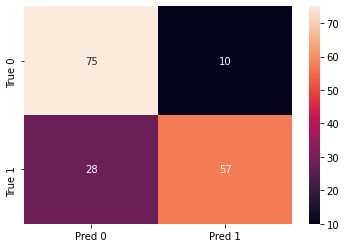

In [222]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [223]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        85
           1       0.85      0.67      0.75        85

    accuracy                           0.78       170
   macro avg       0.79      0.78      0.77       170
weighted avg       0.79      0.78      0.77       170



The neural network model has an average f1-score of 78%.

Its training accuracy is 80% and validation accuracy is about 80%. Hence the model is well balanced.

In [240]:
o1_summary.update({'nn' : [0.80, 0.80, 0.78]})

In [241]:
o1_summary

{'lr': [0.7817109144542773, 0.7529411764705882, 0.75],
 'svm': [0.7728613569321534, 0.7176470588235294, 0.72],
 'knn': [0.9911504424778761, 0.7705882352941177, 0.77],
 'nb': [0.7625368731563422, 0.7058823529411765, 0.71],
 'dt': [0.9911504424778761, 0.7470588235294118, 0.75],
 'rf': [0.8525073746312685, 0.8058823529411765, 0.81],
 'gb': [0.9380530973451328, 0.8, 0.8],
 'xgb': [0.9823008849557522, 0.7764705882352941, 0.78],
 'nn': [0.8, 0.8, 0.78]}

#### Conclusion for option 1

In [246]:
o1_df = pd.DataFrame.from_dict(o1_summary, orient = 'index', columns = ['Training accuracy', 'Testing accuracy', 'f1-score'])

In [251]:
o1_df.apply(lambda x : np.round(x, 2))

,Training accuracy,Testing accuracy,f1-score
lr,0.78,0.75,0.75
svm,0.77,0.72,0.72
knn,0.99,0.77,0.77
nb,0.76,0.71,0.71
dt,0.99,0.75,0.75
rf,0.85,0.81,0.81
gb,0.94,0.80,0.80
xgb,0.98,0.78,0.78
nn,0.80,0.80,0.78


The random forest model has the highest average f1 score of about 81%. It is also well balanced in terms of training and testing accuracies. Hence, in scenario of option 1, random forest model is the prefered model.

### Model building with Option 2 Sub 1

In [253]:
train2 = train.drop(['ticket_code', 'ticket_num'], axis = 1)

In [254]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [255]:
train2[train2['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [256]:
train2.drop([61, 829], axis = 0, inplace = True)

In [257]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [258]:
train2['Age'].fillna(train2['Age'].median(), inplace = True)

In [259]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Convert 'Sex' and 'Embarked' columns to type category

In [260]:
train2['Sex'] = train2['Sex'].astype('category')
train2['Embarked'] = train2['Embarked'].astype('category')

In [261]:
train2['Age'] = train2['Age'].astype('int64')

In [262]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    int64   
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(2), float64(1), int64(5)
memory usage: 50.6 KB


In [263]:
train2 = pd.get_dummies(train2, columns = ['Sex', 'Embarked'])

In [264]:
train2.drop(['Sex_male'], axis = 1, inplace = True) #Do not need this column as it adds no new information

In [265]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,0,0,1
1,1,1,38,1,0,71.2833,1,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,1
4,0,3,35,0,0,8.0500,0,0,0,1


In [266]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    int64  
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_female  889 non-null    uint8  
 7   Embarked_C  889 non-null    uint8  
 8   Embarked_Q  889 non-null    uint8  
 9   Embarked_S  889 non-null    uint8  
dtypes: float64(1), int64(5), uint8(4)
memory usage: 52.1 KB


Setting up train and test data:

In [267]:
X = train2.drop(['Survived'], axis = 1)
y = train2['Survived']

In [268]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Undersampling will wipe off almost half of the data. Oversampling must be used. 

In [269]:
#trying SMOTE oversampling
over_sampler = SMOTE(random_state = 1)
X_resampled, y_resampled  = over_sampler.fit_resample(X, y)

In [270]:
X_resampled.shape, y_resampled.shape

((1098, 9), (1098,))

In [271]:
y_resampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [272]:
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [273]:
X_resampled[0]

array([1.        , 0.275     , 0.125     , 0.        , 0.01415106,
       0.        , 0.        , 0.        , 1.        ])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1, stratify = y_resampled)

In [275]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((878, 9), (220, 9), (878,), (220,))

Algorithms to try:<br>
-Logistic Regression <br>
-SVM <br>
-KNN <br>
-Naive-Bayes<br>
-Decision Tree Classifier <br>
-Random Forest Classifier <br>
-Gradient Boost classifier <br>
-XGBoost<br>
-NN


<i>Logistic Regression:</i>

In [276]:
lr = LogisticRegression(random_state = 1, solver = 'liblinear') 
lr_scores = cross_val_score(lr, X_train, y_train, cv = 3)

In [277]:
lr_scores

array([0.75426621, 0.78156997, 0.80821918])

In [278]:
lr_scores.mean()

0.7813517851855315

The logistic regression model has an average accuracy of about 78%.

In [279]:
lr.fit(X_train, y_train) 
pred_test = lr.predict(X_test)

In [280]:
pred_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

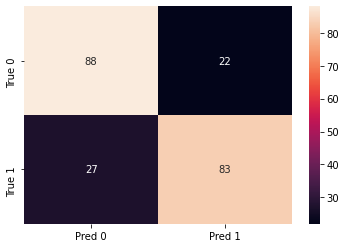

In [281]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [282]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = lr.classes_))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       110
           1       0.79      0.75      0.77       110

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



According to the classification report, the model has an average f1-score of about 0.78

In [283]:
print('Training accuracy:',lr.score(X_train, y_train))

Training accuracy: 0.7881548974943052


In [284]:
print('Testing accuracy:',lr.score(X_test, y_test))

Testing accuracy: 0.7772727272727272


The model is fairly balanced.

In [286]:
o21_summary = {'lr': [lr.score(X_train, y_train), lr.score(X_test, y_test), 0.78]}
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78]}

<i>SVM</i>

In [287]:
svc = SVC(random_state = 1)
svc_scores = cross_val_score(svc, X_train, y_train, cv = 3)

In [288]:
svc_scores

array([0.74744027, 0.79522184, 0.78767123])

In [289]:
svc_scores.mean()

0.7767777829725558

Average svc accuracy is about 78%.

In [290]:
params = {'C' : [0.8, 1, 1.2, 1.4], 'kernel' : ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=1),
             param_grid={'C': [0.8, 1, 1.2, 1.4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [291]:
grid.best_params_

{'C': 0.8, 'kernel': 'rbf'}

In [130]:
svc_scores = cross_val_score(SVC(C = 0.8), X_train, y_train, cv = 3)

In [292]:
svc_scores

array([0.74744027, 0.79522184, 0.78767123])

In [293]:
svc_scores.mean()

0.7767777829725558

The average accuracy is still about 78%.

In [294]:
svc = SVC(C = 0.8)
svc.fit(X_train, y_train)

SVC(C=0.8)

In [295]:
pred_test = svc.predict(X_test)

<AxesSubplot:>

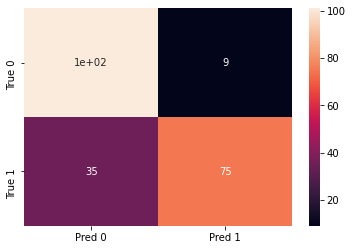

In [296]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [297]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = svc.classes_))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       110
           1       0.89      0.68      0.77       110

    accuracy                           0.80       220
   macro avg       0.82      0.80      0.80       220
weighted avg       0.82      0.80      0.80       220



The svc model has a higher mean accuracy score compared to that of logistic regression model. However, it predicts more false negatives compared to the logistic regression model.

The average f1 score of the svc model is about 80%.

In [137]:
print('Training accuracy:',svc.score(X_train, y_train))

Training accuracy: 0.7961275626423691


In [139]:
print('Test accuracy:',svc.score(X_test, y_test))

Test accuracy: 0.8


The test accuracy and training accuracy are almost same.

In [299]:
o21_summary.update({'svm': [svc.score(X_train, y_train), svc.score(X_test, y_test), 0.80]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8]}

<i>KNN</i>

In [300]:
knn = KNeighborsClassifier()

In [301]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 3)

In [302]:
knn_scores

array([0.78498294, 0.79863481, 0.81506849])

In [303]:
knn_scores.mean()

0.7995620801969859

The mean accuracy of the knn model is about 80%.

In [304]:
params = {'n_neighbors': [1,2,3,4,5,6], 'weights' : ['uniform', 'distance'], 'p' :[2,3]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [305]:
grid.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [306]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, weights = 'uniform')

In [307]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 3)

In [308]:
knn_scores

array([0.78498294, 0.79863481, 0.81506849])

In [309]:
knn_scores.mean()

0.7995620801969859

The mean accuracy of knn model is about 80%.

In [310]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [311]:
pred_test = knn.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

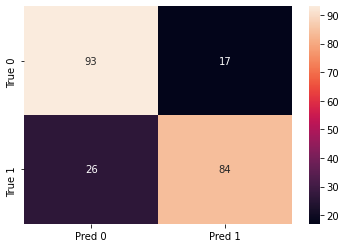

In [312]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [313]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.83      0.76      0.80       110

    accuracy                           0.80       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220



The average f1 score of knn model is about 80%.

In [314]:
print('Training accuracy:',knn.score(X_train, y_train))

Training accuracy: 0.856492027334852


In [315]:
print('Training accuracy:',knn.score(X_test, y_test))

Training accuracy: 0.8045454545454546


This model is slightly overfit compared to other models.

In [316]:
o21_summary.update({'knn': [knn.score(X_train, y_train), knn.score(X_test, y_test), 0.80]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8]}

<i>GausianNB</i>

In [317]:
nb_scores = cross_val_score(GaussianNB(), X_train, y_train, cv = 3)

In [318]:
nb_scores

array([0.75085324, 0.72354949, 0.78082192])

In [319]:
nb_scores.mean()

0.7517415493945485

The average accuracy of this model is 75%.

In [320]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [321]:
pred_test = nb.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

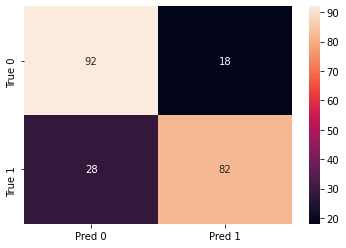

In [322]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [323]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       110
           1       0.82      0.75      0.78       110

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



The average f1 score of Naive Bayes model is about 79%.

In [163]:
print('Training accuracy:',nb.score(X_train, y_train))

Training accuracy: 0.7665148063781321


In [165]:
print('Test accuracy:',nb.score(X_test, y_test))

Test accuracy: 0.7909090909090909


This model performed better at test set than at train set.

In [324]:
o21_summary.update({'nb': [nb.score(X_train, y_train), nb.score(X_test, y_test), 0.79]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8],
 'nb': [0.7665148063781321, 0.7909090909090909, 0.79]}

<i>Decision Tree Classifier</i>

In [325]:
dt_score = cross_val_score(DecisionTreeClassifier(random_state = 1), X_train, y_train, cv = 3)

In [326]:
dt_score

array([0.78156997, 0.79522184, 0.76369863])

In [327]:
dt_score.mean()

0.7801634796702355

The average accuracy is about 78%.

In [328]:
params = {'max_features' : ['auto', 'sqrt', 'log2'], 'ccp_alpha' : [0, 0.05, 0.1], 'min_samples_split' : [2,3]}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0, 0.05, 0.1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3]})

In [329]:
grid.best_params_

{'ccp_alpha': 0, 'max_features': 'auto', 'min_samples_split': 2}

In [330]:
dt = DecisionTreeClassifier(random_state = 1, max_features = 'auto')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features='auto', random_state=1)

In [331]:
pred_test = dt.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

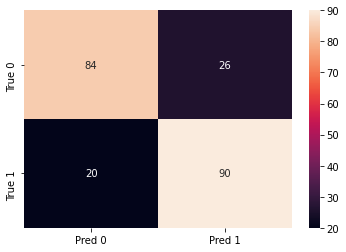

In [332]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [333]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       110
           1       0.78      0.82      0.80       110

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



The average f1 score is about 79%.

In [334]:
print('Training accuracy:',dt.score(X_train, y_train))

Training accuracy: 0.9817767653758542


In [335]:
print('Test accuracy:',dt.score(X_test, y_test))

Test accuracy: 0.7909090909090909


This model is overfit.

In [337]:
dt = DecisionTreeClassifier(random_state = 1, ccp_alpha = 0.0011)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0011, random_state=1)

In [338]:
pred_test = dt.predict(X_test)

<AxesSubplot:>

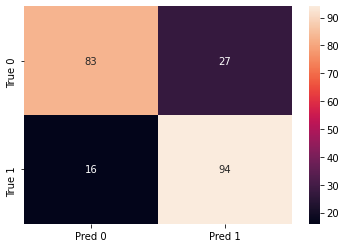

In [339]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [340]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       110
           1       0.78      0.85      0.81       110

    accuracy                           0.80       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220



In [341]:
print('Training accuracy:',dt.score(X_train, y_train))

Training accuracy: 0.9498861047835991


In [342]:
print('Test accuracy:',dt.score(X_test, y_test))

Test accuracy: 0.8045454545454546


The model is still overfit. Increasing pruning reduces train and test accuracies.

In [343]:
o21_summary.update({'dt': [dt.score(X_train, y_train), dt.score(X_test, y_test), 0.80]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8],
 'nb': [0.7665148063781321, 0.7909090909090909, 0.79],
 'dt': [0.9498861047835991, 0.8045454545454546, 0.8]}

<i>Random Forest</i>

In [344]:
rf_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 3)

In [345]:
rf_scores

array([0.80887372, 0.79863481, 0.8390411 ])

In [346]:
rf_scores.mean()

0.8155165427712064

Random Forest model has an average accuracy of about 81%. This is the highest average accuracy yet.

In [347]:
params = {'n_estimators' : [100, 250, 500], 'max_features' : ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(RandomForestClassifier(random_state = 1, oob_score = True), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500]})

In [348]:
grid.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [349]:
rf = RandomForestClassifier(random_state = 1, oob_score = True, n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

In [350]:
pred_test = rf.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

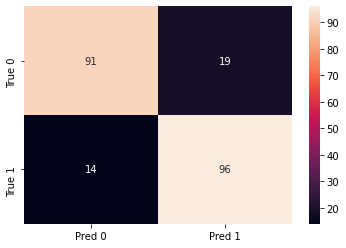

In [351]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [352]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.83      0.87      0.85       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



This model has an average f1 score of 85%. 

In [353]:
print('Training accuracy:',rf.score(X_train, y_train))

Training accuracy: 0.9817767653758542


In [354]:
print('Testing accuracy:',rf.score(X_test, y_test))

Testing accuracy: 0.85


The model is overfit.

In [355]:
rf = RandomForestClassifier(random_state = 1, oob_score = True, ccp_alpha = 0.0024, n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.0024, n_estimators=500, oob_score=True,
                       random_state=1)

In [356]:
print('Training accuracy:',rf.score(X_train, y_train))

Training accuracy: 0.8997722095671982


In [357]:
print('Training accuracy:',rf.score(X_test, y_test))

Training accuracy: 0.8318181818181818


In [358]:
pred_test = rf.predict(X_test)

In [359]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.84      0.82      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



The model after pruning is less overfit and has an average f1-score of 83%

In [360]:
o21_summary.update({'rf': [rf.score(X_train, y_train), rf.score(X_test, y_test), 0.83]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8],
 'nb': [0.7665148063781321, 0.7909090909090909, 0.79],
 'dt': [0.9498861047835991, 0.8045454545454546, 0.8],
 'rf': [0.8997722095671982, 0.8318181818181818, 0.83]}

<i>Gradient Boost<i>

In [361]:
gb_score = cross_val_score(GradientBoostingClassifier(random_state = 1), X_train, y_train, cv = 3)

In [362]:
gb_score

array([0.81569966, 0.81228669, 0.80821918])

In [363]:
gb_score.mean()

0.8120685087350196

Average accuracy of the Gradient Boosting model is about 81%.

In [364]:
params = {'learning_rate': [0.1, 0.15, 0.2], 'n_estimators' : [100, 200, 500]}
grid = GridSearchCV(GradientBoostingClassifier(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 500]})

In [365]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [366]:
gb = GradientBoostingClassifier(random_state = 1, n_estimators = 500)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [367]:
pred_test = gb.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

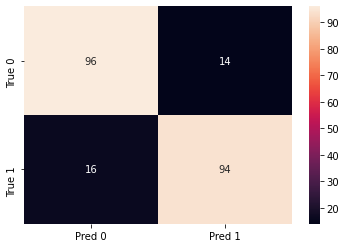

In [368]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [369]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.87      0.85      0.86       110

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



The gradient boosting model has an average f1 score of 86%.

In [372]:
print('Training accuracy:',gb.score(X_train, y_train))

Training accuracy: 0.9612756264236902


In [373]:
print('Testing accuracy:',gb.score(X_test, y_test))

Testing accuracy: 0.8636363636363636


In [374]:
o21_summary.update({'gb': [gb.score(X_train, y_train), gb.score(X_test, y_test), 0.86]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8],
 'nb': [0.7665148063781321, 0.7909090909090909, 0.79],
 'dt': [0.9498861047835991, 0.8045454545454546, 0.8],
 'rf': [0.8997722095671982, 0.8318181818181818, 0.83],
 'gb': [0.9612756264236902, 0.8636363636363636, 0.86]}

<i>XGBoost Classifier</i>

In [375]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [376]:
pred_test = xgb.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

<AxesSubplot:>

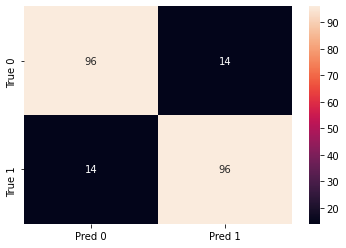

In [377]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [378]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       110
           1       0.87      0.87      0.87       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



The gradient boost algorith has an average f1-score of about 87%.

In [379]:
print('Training accuracy:',xgb.score(X_train, y_train))

Training accuracy: 0.9760820045558086


In [380]:
print('Testing accuracy:',xgb.score(X_test, y_test))

Testing accuracy: 0.8727272727272727


This model is overfit but has the highest testing accuracy yet.

In [381]:
o21_summary.update({'xgb': [xgb.score(X_train, y_train), xgb.score(X_test, y_test), 0.87]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8],
 'nb': [0.7665148063781321, 0.7909090909090909, 0.79],
 'dt': [0.9498861047835991, 0.8045454545454546, 0.8],
 'rf': [0.8997722095671982, 0.8318181818181818, 0.83],
 'gb': [0.9612756264236902, 0.8636363636363636, 0.86],
 'xgb': [0.9760820045558086, 0.8727272727272727, 0.87]}

<i>Neural Network</i>

In [251]:
X_train.shape

(878, 9)

In [382]:
nn = Sequential()
nn.add(Input(shape = (X_train.shape[1],)))
nn.add(Dense(units = 200, activation = 'relu', ))
nn.add(Dropout(0.4))
nn.add(Dense(units = 200, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 100, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 100, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 10, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [253]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

In [254]:
history = nn.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 20)

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 0.6854 - accuracy: 0.5627 - val_loss: 0.6497 - val_accuracy: 0.7159
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6154 - val_loss: 0.5673 - val_accuracy: 0.7557
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5709 - accuracy: 0.7066 - val_loss: 0.4905 - val_accuracy: 0.7557
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5688 - accuracy: 0.7308 - val_loss: 0.5073 - val_accuracy: 0.7614
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5143 - accuracy: 0.7578 - val_loss: 0.4759 - val_accuracy: 0.7614
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.7806 - val_loss: 0.4792 - val_accuracy: 0.7273
Epoch 7/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7621 - val_loss: 0.4801 - val_accuracy: 0.7500
Epoch 8/20
22/22 [=

In [255]:
pred_test = nn.predict(X_test)

In [256]:
pred_test = [1 if (val > 0.5) else 0 for val in pred_test]

<AxesSubplot:>

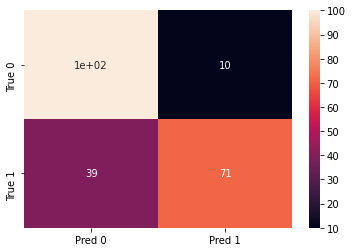

In [257]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [258]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       110
           1       0.88      0.65      0.74       110

    accuracy                           0.78       220
   macro avg       0.80      0.78      0.77       220
weighted avg       0.80      0.78      0.77       220



The neural network model has an average f1-score of 77%.

Its training accuracy is 78% and validation accuracy is about 76%. 

In [383]:
o21_summary.update({'nn': [0.78, 0.77, 0.78]})
o21_summary

{'lr': [0.7881548974943052, 0.7772727272727272, 0.78],
 'svm': [0.7961275626423691, 0.8, 0.8],
 'knn': [0.856492027334852, 0.8045454545454546, 0.8],
 'nb': [0.7665148063781321, 0.7909090909090909, 0.79],
 'dt': [0.9498861047835991, 0.8045454545454546, 0.8],
 'rf': [0.8997722095671982, 0.8318181818181818, 0.83],
 'gb': [0.9612756264236902, 0.8636363636363636, 0.86],
 'xgb': [0.9760820045558086, 0.8727272727272727, 0.87],
 'nn': [0.78, 0.77, 0.78]}

#### Conclusion for option 2 sub 1

In [384]:
o21_df = pd.DataFrame.from_dict(o21_summary, orient = 'index', columns = ['Training accuracy', 'Testing accuracy', 'f1 score'])

In [385]:
o21_df.apply(lambda x : round(x,2))

,Training accuracy,Testing accuracy,f1 score
lr,0.79,0.78,0.78
svm,0.80,0.80,0.80
knn,0.86,0.80,0.80
nb,0.77,0.79,0.79
dt,0.95,0.80,0.80
rf,0.90,0.83,0.83
gb,0.96,0.86,0.86
xgb,0.98,0.87,0.87
nn,0.78,0.77,0.78


Since the models with highest f1 score are all overfit, XGBoost model can be chosen as the final model. It has a high test accuracy and f1-score.

### Model building with Option 2 Sub 2

In [105]:
train3 = train.copy(deep = True)
train3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_code,ticket_num
0,0,3,male,22.0,1,0,7.2500,S,a5,21171.0
1,1,1,female,38.0,1,0,71.2833,C,pc,17599.0
2,1,3,female,26.0,0,0,7.9250,S,stono2,3101282.0
3,1,1,female,35.0,1,0,53.1000,S,,113803.0
4,0,3,male,35.0,0,0,8.0500,S,,373450.0


In [106]:
#replacing all missing ticket_num values by -1
train3['ticket_num'].fillna(-1, inplace = True)

In [107]:
train['ticket_code'].unique()

array(['a5', 'pc', 'stono2', '', 'pp', 'ca', 'scparis', 'sca4', 'a4',
       'sp', 'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'line',
       'fcc', 'swpp', 'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle',
       'sopp', 'fc', 'sotono2', 'casoton'], dtype=object)

In [108]:
#replacing all '' empty strings in ticket_code by 'no_code'
train3['ticket_code'] = train3['ticket_code'].apply(lambda x : 'no_code' if (x == '') else x)

In [109]:
train3['ticket_code'].unique()

array(['a5', 'pc', 'stono2', 'no_code', 'pp', 'ca', 'scparis', 'sca4',
       'a4', 'sp', 'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa',
       'line', 'fcc', 'swpp', 'scow', 'ppp', 'sc', 'scah', 'as',
       'scahbasle', 'sopp', 'fc', 'sotono2', 'casoton'], dtype=object)

In [110]:
#label all unique ticket_code by numbers
le = LabelEncoder()
train3['ticket_code'] = le.fit_transform(train3['ticket_code'])

In [111]:
#impute missing values in Age
train3['Age'].fillna(train3['Age'].median(), inplace = True)

In [112]:
train3.drop([61, 829], axis = 0, inplace = True)

In [113]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   ticket_code  889 non-null    int32  
 9   ticket_num   889 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 72.9+ KB


Convert 'Sex' and 'Embarked' columns to type category

In [114]:
train3['Sex'] = train3['Sex'].astype('category')
train3['Embarked'] = train3['Embarked'].astype('category')

In [115]:
train3['Age'] = train3['Age'].astype('int64')

In [116]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     889 non-null    int64   
 1   Pclass       889 non-null    int64   
 2   Sex          889 non-null    category
 3   Age          889 non-null    int64   
 4   SibSp        889 non-null    int64   
 5   Parch        889 non-null    int64   
 6   Fare         889 non-null    float64 
 7   Embarked     889 non-null    category
 8   ticket_code  889 non-null    int32   
 9   ticket_num   889 non-null    float64 
dtypes: category(2), float64(2), int32(1), int64(5)
memory usage: 61.0 KB


In [117]:
train3 = pd.get_dummies(train3, columns = ['Sex', 'Embarked'])

In [118]:
train3.drop(['Sex_male'], axis = 1, inplace = True) #Do not need this column as it adds no new information

In [119]:
train3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_code,ticket_num,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,21171.0,0,0,0,1
1,1,1,38,1,0,71.2833,11,17599.0,1,1,0,0
2,1,3,26,0,0,7.9250,26,3101282.0,1,0,0,1
3,1,1,35,1,0,53.1000,10,113803.0,1,0,0,1
4,0,3,35,0,0,8.0500,10,373450.0,0,0,0,1


In [120]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Age          889 non-null    int64  
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   ticket_code  889 non-null    int32  
 7   ticket_num   889 non-null    float64
 8   Sex_female   889 non-null    uint8  
 9   Embarked_C   889 non-null    uint8  
 10  Embarked_Q   889 non-null    uint8  
 11  Embarked_S   889 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), uint8(4)
memory usage: 62.5 KB


Setting up train and test data:

In [121]:
X = train3.drop(['Survived'], axis = 1)
y = train3['Survived']

In [122]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Undersampling will wipe off almost half of the data. Oversampling must be used. 

In [123]:
#trying SMOTE oversampling
over_sampler = SMOTE(random_state = 1)
X_resampled, y_resampled  = over_sampler.fit_resample(X, y)

In [124]:
X_resampled.shape, y_resampled.shape

((1098, 11), (1098,))

In [125]:
y_resampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [126]:
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [127]:
X_resampled[0]

array([1.        , 0.275     , 0.125     , 0.        , 0.01415106,
       0.03448276, 0.00682677, 0.        , 0.        , 0.        ,
       1.        ])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1, stratify = y_resampled)

In [129]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((878, 11), (220, 11), (878,), (220,))

Algorithms to try:<br>
-Logistic Regression <br>
-SVM <br>
-KNN <br>
-Naive-Bayes<br>
-Decision Tree Classifier <br>
-Random Forest Classifier <br>
-Gradient Boost classifier <br>
-XGBoost<br>
-NN


<i>Logistic Regression:</i>

In [130]:
lr = LogisticRegression(random_state = 1, solver = 'liblinear') 
lr_scores = cross_val_score(lr, X_train, y_train, cv = 3)

In [131]:
lr_scores

array([0.778157  , 0.76109215, 0.80479452])

In [132]:
lr_scores.mean()

0.7813478891018747

The logistic regression model has an average accuracy of about 78%.

In [133]:
lr.fit(X_train, y_train) 
pred_test = lr.predict(X_test)

In [134]:
pred_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

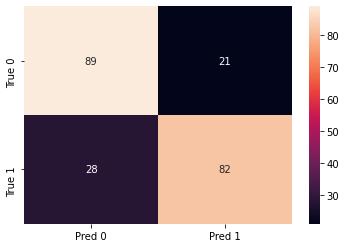

In [135]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [136]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = lr.classes_))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       110
           1       0.80      0.75      0.77       110

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



According to the classification report, the model has an average f1-score of about 0.78

In [137]:
print('Training accuracy:',lr.score(X_train, y_train))

Training accuracy: 0.785876993166287


In [138]:
print('Testing accuracy:',lr.score(X_test, y_test))

Testing accuracy: 0.7772727272727272


The model is fairly balanced.

In [139]:
o22_summary = {'lr' : [lr.score(X_train, y_train), lr.score(X_test, y_test), 0.78]}
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78]}

<i>SVM</i>

In [140]:
svc = SVC(random_state = 1)
svc_scores = cross_val_score(svc, X_train, y_train, cv = 3)

In [141]:
svc_scores

array([0.778157  , 0.76791809, 0.79452055])

In [142]:
svc_scores.mean()

0.780198544423146

Average svc accuracy is about 78%.

In [154]:
params = {'C' : [0.8, 1, 1.2, 1.4], 'kernel' : ['linear', 'rbf', 'poly'], 'degree': [3, 5, 7]}
grid = GridSearchCV(SVC(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=1),
             param_grid={'C': [0.8, 1, 1.2, 1.4], 'degree': [3, 5, 7],
                         'kernel': ['linear', 'rbf', 'poly']})

In [155]:
grid.best_params_

{'C': 1, 'degree': 7, 'kernel': 'poly'}

In [156]:
svc_scores = cross_val_score(SVC(C = 0.8, kernel = 'poly', degree = 7), X_train, y_train, cv = 3)

In [157]:
svc_scores

array([0.80204778, 0.76791809, 0.80136986])

In [158]:
svc_scores.mean()

0.7904452444402886

The average accuracy is still about 79%.

In [159]:
svc = SVC(C = 0.8, kernel = 'poly', degree = 11)
svc.fit(X_train, y_train)

SVC(C=0.8, degree=11, kernel='poly')

In [160]:
pred_test = svc.predict(X_test)

<AxesSubplot:>

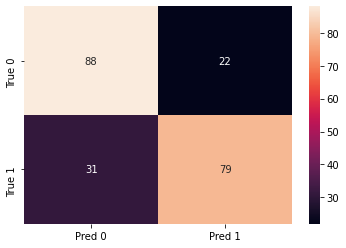

In [161]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [162]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = svc.classes_))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       110
           1       0.78      0.72      0.75       110

    accuracy                           0.76       220
   macro avg       0.76      0.76      0.76       220
weighted avg       0.76      0.76      0.76       220



The average f1 score of the svc model is about 76%.

In [163]:
print('Training accuracy:',svc.score(X_train, y_train))

Training accuracy: 0.8701594533029613


In [164]:
print('Test accuracy:',svc.score(X_test, y_test))

Test accuracy: 0.759090909090909


The model is overfit.

In [165]:
o22_summary.update({'svm' : [svc.score(X_train, y_train), svc.score(X_test, y_test), 0.76]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76]}

<i>KNN</i>

In [166]:
knn = KNeighborsClassifier()

In [167]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 3)

In [168]:
knn_scores

array([0.79180887, 0.7883959 , 0.7739726 ])

In [169]:
knn_scores.mean()

0.7847257936322408

The mean accuracy of the knn model is about 78%.

In [170]:
params = {'n_neighbors': [1,2,3,4,5,6], 'weights' : ['uniform', 'distance'], 'p' :[2,3]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [171]:
grid.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [172]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, weights = 'distance')

In [173]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 3)

In [174]:
knn_scores

array([0.79522184, 0.778157  , 0.78082192])

In [175]:
knn_scores.mean()

0.7847335857995543

The mean accuracy of knn model is about 78%.

In [176]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [177]:
pred_test = knn.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

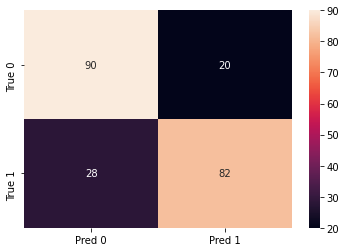

In [178]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [179]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       110
           1       0.80      0.75      0.77       110

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



The average f1 score of knn model is about 80%.

In [180]:
print('Training accuracy:',knn.score(X_train, y_train))

Training accuracy: 0.9977220956719818


In [181]:
print('Training accuracy:',knn.score(X_test, y_test))

Training accuracy: 0.7818181818181819


This model is overfit.

In [183]:
o22_summary.update({'knn' : [knn.score(X_train, y_train), knn.score(X_test, y_test), 0.78]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78]}

<i>GausianNB</i>

In [184]:
nb_scores = cross_val_score(GaussianNB(), X_train, y_train, cv = 3)

In [185]:
nb_scores

array([0.72696246, 0.71331058, 0.7739726 ])

In [186]:
nb_scores.mean()

0.7380818800941293

The average accuracy of this model is 73%.

In [187]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [188]:
pred_test = nb.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

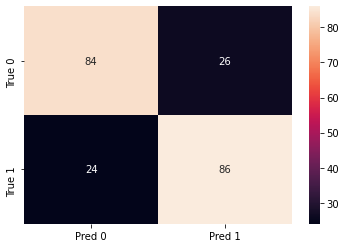

In [189]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [190]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       110
           1       0.77      0.78      0.77       110

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



The average f1 score of Naive Bayes model is about 77%.

In [191]:
print('Training accuracy:',nb.score(X_train, y_train))

Training accuracy: 0.7403189066059226


In [192]:
print('Test accuracy:',nb.score(X_test, y_test))

Test accuracy: 0.7727272727272727


This model performed better at test set than at train set.

In [193]:
o22_summary.update({'nb' : [nb.score(X_train, y_train), nb.score(X_test, y_test), 0.77]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78],
 'nb': [0.7403189066059226, 0.7727272727272727, 0.77]}

<i>Decision Tree Classifier</i>

In [194]:
dt_score = cross_val_score(DecisionTreeClassifier(random_state = 1), X_train, y_train, cv = 3)

In [195]:
dt_score

array([0.74744027, 0.78498294, 0.78424658])

In [196]:
dt_score.mean()

0.772223261177864

The average accuracy is about 77%.

In [197]:
params = {'max_features' : ['auto', 'sqrt', 'log2'], 'ccp_alpha' : [0, 0.05, 0.1], 'min_samples_split' : [2,3]}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0, 0.05, 0.1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3]})

In [198]:
grid.best_params_

{'ccp_alpha': 0, 'max_features': 'auto', 'min_samples_split': 2}

In [199]:
dt = DecisionTreeClassifier(random_state = 1, max_features = 'auto')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features='auto', random_state=1)

In [200]:
pred_test = dt.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

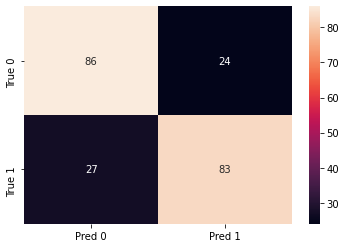

In [201]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [202]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       110
           1       0.78      0.75      0.76       110

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



The average f1 score is about 77%.

In [203]:
print('Training accuracy:',dt.score(X_train, y_train))

Training accuracy: 0.9977220956719818


In [204]:
print('Test accuracy:',dt.score(X_test, y_test))

Test accuracy: 0.7681818181818182


This model is overfit.

In [205]:
dt = DecisionTreeClassifier(random_state = 1, ccp_alpha = 0.0011)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0011, random_state=1)

In [206]:
pred_test = dt.predict(X_test)

<AxesSubplot:>

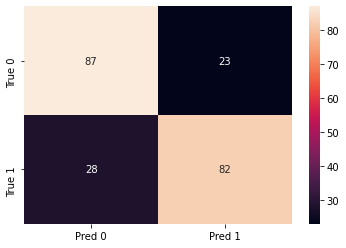

In [207]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [208]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       110
           1       0.78      0.75      0.76       110

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



In [209]:
print('Training accuracy:',dt.score(X_train, y_train))

Training accuracy: 0.9646924829157175


In [210]:
print('Test accuracy:',dt.score(X_test, y_test))

Test accuracy: 0.7681818181818182


The model is still overfit. Increasing pruning reduces train and test accuracies.

In [211]:
o22_summary.update({'dt' : [dt.score(X_train, y_train), dt.score(X_test, y_test), 0.77]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78],
 'nb': [0.7403189066059226, 0.7727272727272727, 0.77],
 'dt': [0.9646924829157175, 0.7681818181818182, 0.77]}

<i>Random Forest</i>

In [212]:
rf_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 3)

In [213]:
rf_scores

array([0.80887372, 0.81228669, 0.81849315])

In [214]:
rf_scores.mean()

0.8132178534137484

Random Forest model has an average accuracy of about 81%. This is the highest average accuracy yet.

In [215]:
params = {'n_estimators' : [100, 250, 500], 'max_features' : ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(RandomForestClassifier(random_state = 1, oob_score = True), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500]})

In [216]:
grid.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [217]:
rf = RandomForestClassifier(random_state = 1, oob_score = True, n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

In [218]:
pred_test = rf.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

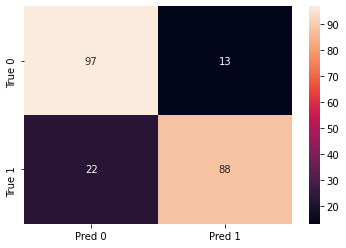

In [219]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [220]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.87      0.80      0.83       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



This model has an average f1 score of 84%. 

In [221]:
print('Training accuracy:',rf.score(X_train, y_train))

Training accuracy: 0.9977220956719818


In [222]:
print('Testing accuracy:',rf.score(X_test, y_test))

Testing accuracy: 0.8409090909090909


The model is overfit.

In [223]:
rf = rf = RandomForestClassifier(random_state = 1, oob_score = True, ccp_alpha = 0.0024, n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.0024, n_estimators=500, oob_score=True,
                       random_state=1)

In [224]:
print('Training accuracy:',rf.score(X_train, y_train))

Training accuracy: 0.9179954441913439


In [225]:
print('Training accuracy:',rf.score(X_test, y_test))

Training accuracy: 0.8090909090909091


In [226]:
pred_test = rf.predict(X_test)

In [227]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       110
           1       0.86      0.74      0.79       110

    accuracy                           0.81       220
   macro avg       0.82      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220



The model after pruning is less overfit and has an average f1-score of 81%

In [228]:
o22_summary.update({'rf' : [rf.score(X_train, y_train), rf.score(X_test, y_test), 0.81]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78],
 'nb': [0.7403189066059226, 0.7727272727272727, 0.77],
 'dt': [0.9646924829157175, 0.7681818181818182, 0.77],
 'rf': [0.9179954441913439, 0.8090909090909091, 0.81]}

<i>Gradient Boost<i>

In [229]:
gb_score = cross_val_score(GradientBoostingClassifier(random_state = 1), X_train, y_train, cv = 3)

In [230]:
gb_score

array([0.8225256 , 0.80546075, 0.81506849])

In [231]:
gb_score.mean()

0.8143516137578506

Average accuracy of the Gradient Boosting model is about 81%.

In [232]:
params = {'learning_rate': [0.1, 0.15, 0.2], 'n_estimators' : [100, 200, 500]}
grid = GridSearchCV(GradientBoostingClassifier(random_state = 1), params, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 500]})

In [233]:
grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [234]:
gb = GradientBoostingClassifier(random_state = 1, n_estimators = 500, learning_rate = 0.2)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=500, random_state=1)

In [235]:
pred_test = gb.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

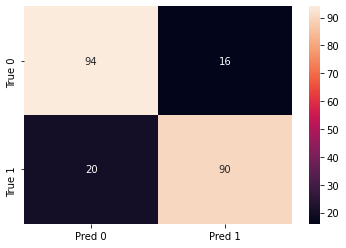

In [236]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [237]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.85      0.82      0.83       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



The gradient boosting model has an average f1 score of 84%.

In [241]:
print('Training accuracy:',gb.score(X_train, y_train))

Training accuracy: 0.9977220956719818


In [242]:
print('Testing accuracy:',gb.score(X_test, y_test))

Testing accuracy: 0.8363636363636363


This model has higher f1 score than random forest model but has similar training and testing accuracies.

In [240]:
o22_summary.update({'gb' : [gb.score(X_train, y_train), gb.score(X_test, y_test), 0.84]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78],
 'nb': [0.7403189066059226, 0.7727272727272727, 0.77],
 'dt': [0.9646924829157175, 0.7681818181818182, 0.77],
 'rf': [0.9179954441913439, 0.8090909090909091, 0.81],
 'gb': [0.9977220956719818, 0.8363636363636363, 0.84]}

<i>XGBoost Classifier</i>

In [243]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [244]:
pred_test = xgb.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

<AxesSubplot:>

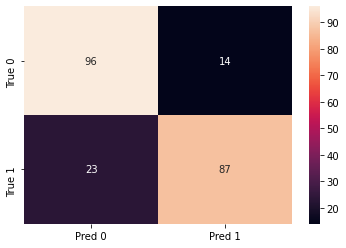

In [245]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [246]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.86      0.79      0.82       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



The gradient boost algorith has an average f1-score of about 83%.

In [247]:
print('Training accuracy:',xgb.score(X_train, y_train))

Training accuracy: 0.9954441913439636


In [248]:
print('Testing accuracy:',xgb.score(X_test, y_test))

Testing accuracy: 0.8318181818181818


This model is overfit but has the highest testing accuracy yet.

In [249]:
o22_summary.update({'xgb' : [xgb.score(X_train, y_train), xgb.score(X_test, y_test), 0.83]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78],
 'nb': [0.7403189066059226, 0.7727272727272727, 0.77],
 'dt': [0.9646924829157175, 0.7681818181818182, 0.77],
 'rf': [0.9179954441913439, 0.8090909090909091, 0.81],
 'gb': [0.9977220956719818, 0.8363636363636363, 0.84],
 'xgb': [0.9954441913439636, 0.8318181818181818, 0.83]}

<i>Neural Network</i>

In [250]:
X_train.shape

(878, 11)

In [251]:
nn = Sequential()
nn.add(Input(shape = (X_train.shape[1],)))
nn.add(Dense(units = 200, activation = 'relu', ))
nn.add(Dropout(0.4))
nn.add(Dense(units = 200, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 100, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 100, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 10, activation = 'relu'))
nn.add(Dropout(0.4))
nn.add(Dense(units = 1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [252]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2400      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

In [259]:
history = nn.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 15ms/step - loss: 0.4238 - accuracy: 0.8148 - val_loss: 0.4377 - val_accuracy: 0.8125
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4392 - accuracy: 0.8148 - val_loss: 0.4384 - val_accuracy: 0.8068
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3923 - accuracy: 0.8219 - val_loss: 0.4383 - val_accuracy: 0.8125
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4021 - accuracy: 0.8162 - val_loss: 0.4374 - val_accuracy: 0.8125
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4009 - accuracy: 0.8319 - val_loss: 0.4352 - val_accuracy: 0.8125
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4296 - accuracy: 0.8362 - val_loss: 0.4390 - val_accuracy: 0.8125
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3839 - accuracy: 0.8291 - val_loss: 0.4388 - val_accuracy: 0.8125
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 11ms/step - loss: 0.3732 - accuracy: 0.8305 - val_loss: 0.4558 - val_accuracy: 0.8239
Epoch 60/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3810 - accuracy: 0.8348 - val_loss: 0.4579 - val_accuracy: 0.8295
Epoch 61/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3816 - accuracy: 0.8433 - val_loss: 0.4545 - val_accuracy: 0.8239
Epoch 62/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3743 - accuracy: 0.8390 - val_loss: 0.4564 - val_accuracy: 0.8182
Epoch 63/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3841 - accuracy: 0.8333 - val_loss: 0.4554 - val_accuracy: 0.8182
Epoch 64/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3794 - accuracy: 0.8205 - val_loss: 0.4512 - val_accuracy: 0.8182
Epoch 65/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3725 - accuracy: 0.8276 - val_loss: 0.4475 - val_accuracy: 0.8295
Epoch 66/100
6/6 [========

In [260]:
pred_test = nn.predict(X_test)

In [261]:
pred_test = [1 if (val > 0.5) else 0 for val in pred_test]

<AxesSubplot:>

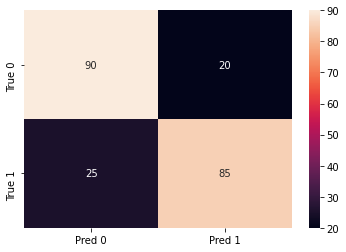

In [262]:
cm = confusion_matrix(y_true = y_test, y_pred = pred_test, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['True 0', 'True 1']], columns = [i for i in ['Pred 0', 'Pred 1']])
sns.heatmap(df_cm, annot = True)

In [257]:
print(classification_report(y_true = y_test, y_pred = pred_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       110
           1       0.86      0.62      0.72       110

    accuracy                           0.76       220
   macro avg       0.78      0.76      0.75       220
weighted avg       0.78      0.76      0.75       220



The neural network model has an average f1-score of 76%.

Its training accuracy is 82% and validation accuracy is about 82%. 

In [264]:
o22_summary.update({'nn' : [0.82, 0.82, 0.76]})
o22_summary

{'lr': [0.785876993166287, 0.7772727272727272, 0.78],
 'svm': [0.8701594533029613, 0.759090909090909, 0.76],
 'knn': [0.9977220956719818, 0.7818181818181819, 0.78],
 'nb': [0.7403189066059226, 0.7727272727272727, 0.77],
 'dt': [0.9646924829157175, 0.7681818181818182, 0.77],
 'rf': [0.9179954441913439, 0.8090909090909091, 0.81],
 'gb': [0.9977220956719818, 0.8363636363636363, 0.84],
 'xgb': [0.9954441913439636, 0.8318181818181818, 0.83],
 'nn': [0.82, 0.82, 0.76]}

#### Conclusion for option 2 Sub 2

In [265]:
o22_df = pd.DataFrame.from_dict(o22_summary, orient = 'index', columns = ['Training accuracy', 'Testing accuracy', 'f1 score'])

In [266]:
o22_df.apply(lambda x : round(x,2))

,Training accuracy,Testing accuracy,f1 score
lr,0.79,0.78,0.78
svm,0.87,0.76,0.76
knn,1.00,0.78,0.78
nb,0.74,0.77,0.77
dt,0.96,0.77,0.77
rf,0.92,0.81,0.81
gb,1.00,0.84,0.84
xgb,1.00,0.83,0.83
nn,0.82,0.82,0.76


Both Gradinet Boost and XGBoost models have high f1-scores and testing scores. However, they are overfit. Random Forest model is less accurate but is also less overfit. It has a high f1 score of 0.81 and testing accuracy of 81%. Thus it is the best model in this scenario. 

## Best way to deal with titanic data

The best f1 score and model balance was in option 2 sub 1 where ticket data was ignored in its entirety and age missing values were imputed. Although in the EDA, ticket_code seemed to suggest a connection to survival, it was no reflected in the models built. (Or that the data need to be handled better to extract more information.)  

With more time at hand, more feature combinations could be tried to come up with better survival models. 

### Conclusion

-Remove cabin and ticket data along with other unnecessary columns. <br>
-Impute missing age values by median <br>
-Use XGBoost to get survival prediction